## This Notebook visualizes my reading data as of May 2023
Data file full_data.csv created in previous notebook (Google Books API).

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

book_data = pd.read_csv('full_data.csv')
book_data.head()

,Title,Author,Genre,ISBN13,My Rating,Average Rating,Publisher,Binding,Number of Pages,Date Read,Date Added,Exclusive Shelf
0,The Genome Odyssey: Medical Mysteries and the ...,Euan Angus Ashley,Science,9781250234995,0,4.23,Celadon Books,Hardcover,400.0,NaN,2023/05/01,to-read
1,Before Your Memory Fades (Before the Coffee Ge...,Toshikazu Kawaguchi,Contemporary Fiction,9780369722690,3,3.91,Hanover Square Press,ebook,220.0,NaN,2023/04/30,read
2,"Kingdom of the Cursed (Kingdom of the Wicked, #2)",Kerri Maniscalco,Fantasy,9781529350500,4,4.19,Hodder & Stoughton,Hardcover,437.0,NaN,2023/02/06,read
3,Tales from the Café (Before the Coffee Gets Co...,Toshikazu Kawaguchi,Contemporary Fiction,9781529050868,4,4.00,Picador,Paperback,192.0,NaN,2023/04/18,read
4,Gene Eating: The Story of Human Appetite,Giles Yeo,Science,9781841882932,0,4.53,Orion Spring,Paperback,NaN,NaN,2023/04/17,to-read


There are few missing values from the Number of Pages column. These will be replaces with the mean value of number of pages in all books.

In [2]:
# replace NaN values in number of pages with the average value
avg_pagecount = book_data['Number of Pages'].mean()
book_data['Number of Pages'] = book_data['Number of Pages'].replace(np.nan, avg_pagecount)

# make ratings numerical values
book_data['My Rating']= pd.to_numeric(book_data['My Rating'])
book_data['Average Rating'] = pd.to_numeric(book_data['Average Rating'])

In [3]:
#split data frame into read and to read sets
read_books = book_data[book_data['Exclusive Shelf']=='read']
toread_books = book_data[book_data['Exclusive Shelf']=='to-read']

# see which genres are least popular
read_books['Genre'].value_counts()
toread_books['Genre'].value_counts()

Contemporary Fiction    45
Science                 22
Classics                11
Business & Economics    10
Memoir                   9
Essays                   8
History                  6
Historical Fiction       5
Self Help                3
Social Science           3
Thriller                 3
Psycology                3
Politics                 2
True Crime               2
Philosphy                2
Biography                2
Art                      2
Fiction                  1
Education                1
Name: Genre, dtype: int64

In [4]:
# will remove the genres with less than 5 count in read and to read books
genres1 = ['Fiction', 'Thriller', 'Romance','Psycology','Race','Biography','Self Help','Historical Fiction']
read_books = read_books[~read_books['Genre'].isin(genres1)]

genres2 = ['Education','Fiction', 'Thriller', 'Romance','Psycology','Race',
           'Biography','Self Help','Historical Fiction', 'True Crime','Art','Philosophy','Social Science']
toread_books = toread_books[~toread_books['Genre'].isin(genres2)]


In [5]:
# function to plot graphs showing breakdown by genre & score
def get_graphs(self):
    
    plots = []
    
    sns.set(style="darkgrid")
    plot1 = sns.catplot(data=self, x='Genre', kind='count', aspect = 2)
    plot1.set_xticklabels(rotation=45)
    plot1.set(title='Books by Category')
    plots.append(plot1)
    
    sns.set(style="darkgrid")
    plot2= sns.catplot(data=self, x='Genre', y='Average Rating', kind='violin', aspect = 2)
    plot2.set(title='Average Goodreads Rating by Genre')
    plot2.set_xticklabels(rotation=45)
    plots.append(plot2)
    
    sns.set(style="darkgrid")
    plot3= sns.catplot(data=self,x='Genre', y='Number of Pages', kind='violin', aspect=2)
    plot3.set(title='Books by number of pages')
    plot3.set_xticklabels(rotation=45)
    plots.append(plot3)
    
    return plots

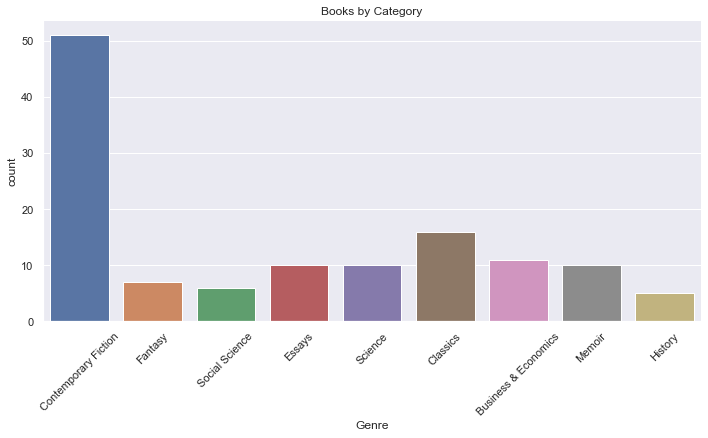

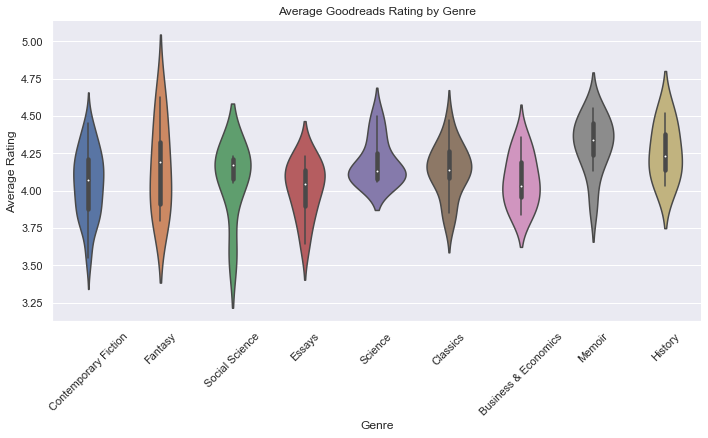

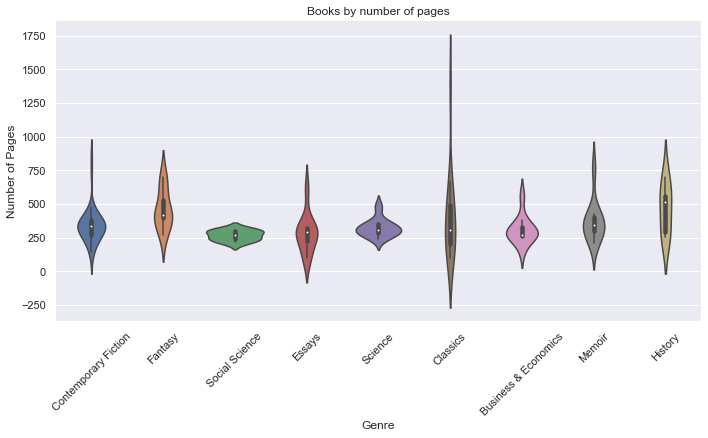

In [6]:
# plot data for read books

get_graphs(read_books)


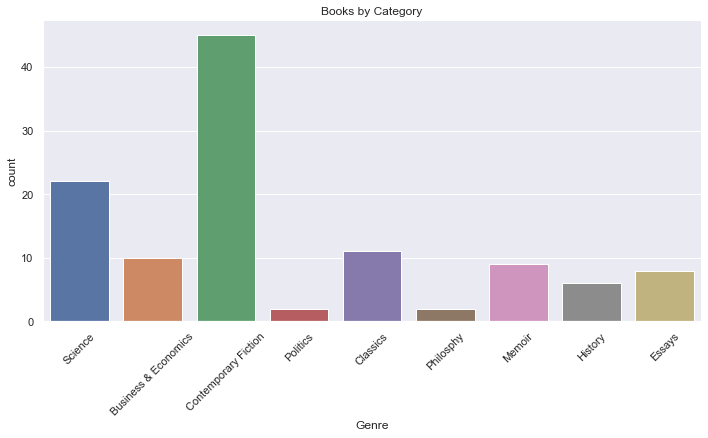

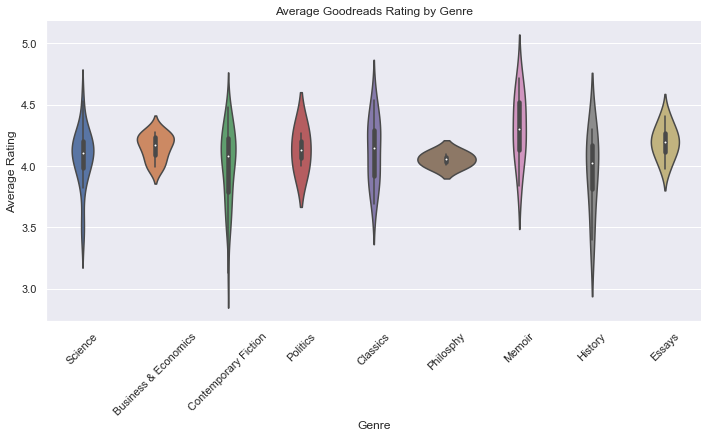

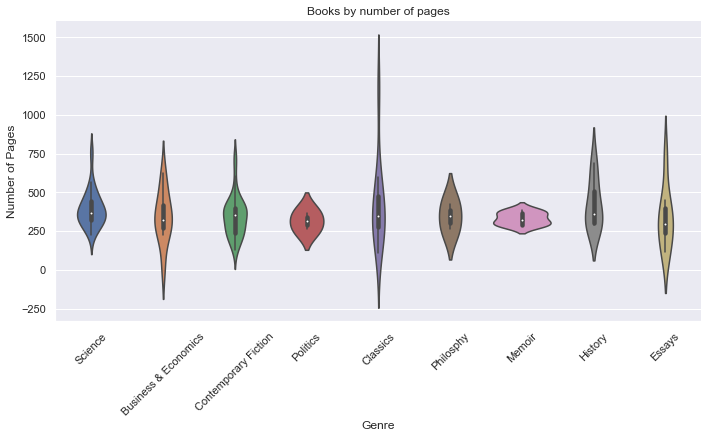

In [7]:
# same analysis on the to read data:
get_graphs(toread_books)

Next, will compare my rating with the average Goodreads rating.

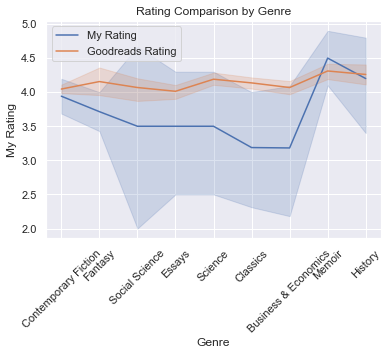

<Figure size 1080x360 with 0 Axes>

In [9]:
# comparing my raiting with the average GR rating

# Create a side-by-side bar plot comparing My Rating and Average Rating by genre
sns.lineplot(data=read_books, x='Genre', y='My Rating', label='My Rating')
sns.lineplot(data=read_books, x='Genre', y='Average Rating',label='Goodreads Rating')
plt.xticks(rotation=45)
plt.title('Rating Comparison by Genre')
plt.figure(figsize=(15,5))
plt.show()
